# Case Study: How Does a Bike-Share Navigate Speedy Success?

## Ask
1. What is the problem we are trying to solve?
2. How do annual members and casual members use Cyclistic bikes differently?
3. How can our insights drive business decisions?

Identifying the main differences between members and casual riders can help us establish who Cyclistic customers are and provide key information that will help develope the business strategy and marketing campaign.

Objective: Design a marketing campaign to convert casual riders into annual members.

Stakeholders:
* Cyclistic executive team: In charge of the final decision, they will decide if the recommended marketing strategy is approved.
* Lily Moreno: Director of marketing, responsible for the development of the marketing campaign and the bike-share initiatives. She is responsible for the success or failure of the marketing campaign based on your data analysis.

## Prepare
Data source:
For this analysis, we have access to a primary data source downloaded from Cyclystic trip data. It is licensed under Motivate International Inc. This dataset consists of quantitative measurements collected from bike trackers, they do not gather personal data from users.

Data credibility (ROCC):
* Reliable: Although the dataset has many incomplete entries, this accounts for less than 0.1% of all data entries, making it reasonable to ignore for the sake of this analyisis.
* Original: Primary data source, the company Cyclistic gathers this data first-hand.
* Comprehensive: The dataset has more than 5 million complete data entries.
* Current: Data is up-to-date as it includes data from the past 12 months.

## Process
Tools used for processing data:
Spreadsheets where avoided because of the raw amount of data in this dataset. For this project, R Studio was the preferred tool used for this project. It has a wide range of tools available and can handle massive amounts of data with ease.

Cleaning and processing:
First we prepare the R Studio environment with the right tools by installing the required packages and libraries:

In [1]:
library(tidyverse) # helps wrangle data
library(janitor) # helps clean data
library(lubridate) # helps wrangle date attributes
library(ggplot2) #helps visualize data
library(dplyr) #Count distinct
library(scales) #For better numbering in plots

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'janitor'


The following objects are masked from 'package:stats':

    chisq.test, fisher.test



Attaching package: 'scales'


The following object is masked from 'package:purrr':

    discard


The following object is masked from 'package:readr':

    col_factor




Data importing and consistency checking

Then we have to import the data to R Studio and check for consistency, we use ‘colnames’ to verify the that the column names match in each dataframe and ‘str’ to check for consistency in data type per column.

Processing (part 2):
1. We stack the individual data frames into one big data frame.
2. We do a check with ‘colnames’, ‘dim’, ‘head’, ‘str’ and ‘summary’.
3. We check for discrepancies in number of rows and distinct rider id’s, they should be the same amount.
4. We check for distinct values in member_casual, it should to be 2.

In [2]:
#Import Data
df1 <- read.csv("data/202207-divvy-tripdata.csv")
df2 <- read.csv("data/202208-divvy-tripdata.csv")
df3 <- read.csv("data/202209-divvy-tripdata.csv")
df4 <- read.csv("data/202210-divvy-tripdata.csv")
df5 <- read.csv("data/202211-divvy-tripdata.csv")
df6 <- read.csv("data/202212-divvy-tripdata.csv")
df7 <- read.csv("data/202301-divvy-tripdata.csv")
df8 <- read.csv("data/202302-divvy-tripdata.csv")
df9 <- read.csv("data/202303-divvy-tripdata.csv")
df10 <- read.csv("data/202304-divvy-publictripdata.csv")
df11 <- read.csv("data/202305-divvy-tripdata.csv")
df12 <- read.csv("data/202306-divvy-tripdata.csv")

In [3]:
all_rides <- bind_rows(df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12)

colnames(all_rides)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [4]:
n_distinct(all_rides$ride_id) #Count distinct ride id, it should be the same number as rows.

[1] 5779444

In [5]:
nrow(all_rides)

[1] 5779444

In [6]:
dim(all_rides)

[1] 5779444      13

In [7]:
head(all_rides)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,954144C2F67B1932,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,Ashland Ave & Blackhawk St,13224,Kingsbury St & Kinzie St,KA1503000043,41.90707,-87.66725,41.88918,-87.63851,member
2,292E027607D218B6,classic_bike,2022-07-26 12:53:38,2022-07-26 12:55:31,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.86962,-87.62398,41.87277,-87.62398,casual
3,57765852588AD6E0,classic_bike,2022-07-03 13:58:49,2022-07-03 14:06:32,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.86962,-87.62398,41.87277,-87.62398,casual
4,B5B6BE44314590E6,classic_bike,2022-07-31 17:44:21,2022-07-31 18:42:50,Buckingham Fountain (Temp),15541,Woodlawn Ave & 55th St,TA1307000164,41.86962,-87.62398,41.79526,-87.59647,casual
5,A4C331F2A00E79E0,classic_bike,2022-07-13 19:49:06,2022-07-13 20:15:24,Wabash Ave & Grand Ave,TA1307000117,Sheffield Ave & Wellington Ave,TA1307000052,41.89147,-87.62676,41.93625,-87.65266,member
6,579D73BE2ED880B3,electric_bike,2022-07-01 17:04:35,2022-07-01 17:13:18,Desplaines St & Randolph St,15535,Clinton St & Roosevelt Rd,WL-008,41.88461,-87.64456,41.86712,-87.64109,member


In [8]:
str(all_rides)

'data.frame':	5779444 obs. of  13 variables:
 $ ride_id           : chr  "954144C2F67B1932" "292E027607D218B6" "57765852588AD6E0" "B5B6BE44314590E6" ...
 $ rideable_type     : chr  "classic_bike" "classic_bike" "classic_bike" "classic_bike" ...
 $ started_at        : chr  "2022-07-05 08:12:47" "2022-07-26 12:53:38" "2022-07-03 13:58:49" "2022-07-31 17:44:21" ...
 $ ended_at          : chr  "2022-07-05 08:24:32" "2022-07-26 12:55:31" "2022-07-03 14:06:32" "2022-07-31 18:42:50" ...
 $ start_station_name: chr  "Ashland Ave & Blackhawk St" "Buckingham Fountain (Temp)" "Buckingham Fountain (Temp)" "Buckingham Fountain (Temp)" ...
 $ start_station_id  : chr  "13224" "15541" "15541" "15541" ...
 $ end_station_name  : chr  "Kingsbury St & Kinzie St" "Michigan Ave & 8th St" "Michigan Ave & 8th St" "Woodlawn Ave & 55th St" ...
 $ end_station_id    : chr  "KA1503000043" "623" "623" "TA1307000164" ...
 $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num  -87.7 -87.6 

In [9]:
summary(all_rides)

   ride_id          rideable_type       started_at          ended_at        
 Length:5779444     Length:5779444     Length:5779444     Length:5779444    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 start_station_name start_station_id   end_station_name   end_station_id    
 Length:5779444     Length:5779444     Length:5779444     Length:5779444    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            

In [10]:
n_distinct(all_rides$member_casual) #Count distinct values to check consistency.

[1] 2

Procccessing (part 3)
1. We remove empty rows.

In [11]:
all_rides <- janitor::remove_empty(all_rides,which = c("cols")) #removes empty columns
all_rides <- janitor::remove_empty(all_rides,which = c("rows")) #removes empty rows

2. We use ‘lubridate’ package to transform ‘started_at’ and ‘ended_at’ to ‘ymd_hms’ and to create ‘start_hour’, ‘end_hour’ and ‘day_of_week’.

In [12]:
all_rides$started_at <- lubridate::ymd_hms(all_rides$started_at) #turns 'started_at' to ymd_hms
all_rides$ended_at <- lubridate::ymd_hms(all_rides$ended_at) #turns 'ended_at' to ymd_hms
all_rides$start_hour <- lubridate::hour(all_rides$started_at)
all_rides$end_hour <- lubridate::hour(all_rides$ended_at)
all_rides$day_of_week <- wday(all_rides$started_at)

3. We add a ride lenght column with ‘difftime’ using ‘ended_at’ and ‘started_at’.

In [13]:
all_rides$ride_length <- difftime(all_rides$ended_at,all_rides$started_at)

4. Then we create a new dataframe excluding the rows with negative lenght time.

In [14]:
sum(all_rides$ride_length < 0, na.rm=TRUE) #counts number of rows < 0 in 'ride_length)

[1] 107

In [15]:
all_rides_v2 <- all_rides[!(all_rides$ride_length<0),]
sum(all_rides_v2$ride_length < 0, na.rm=TRUE) #counts number of rows < 0 in 'ride_length)

[1] 0

5. Finally we change the ‘day_of_week’ from a number to the name of the day.

In [16]:
all_rides_v2 <- all_rides_v2 %>% 
  mutate(day_of_week = recode(day_of_week
                              ,"1" = "Sunday"
                              ,"2" = "Monday"
                              ,"3" = "Tuesday"
                              ,"4" = "Wednesday"
                              ,"5" = "Thursday"
                              ,"6" = "Friday"
                              ,"7" = "Saturday"))

## Analyze
Descriptive analysis on ride_length
* Average:

In [17]:
mean(all_rides_v2$ride_length) #straight average

Time difference of 1100.56 secs

* Midpoint number:

In [18]:
median(all_rides_v2$ride_length) #midpoint number

Time difference of 582 secs

* Longest and shortest ride:

In [19]:
max(all_rides_v2$ride_length) #longest ride

Time difference of 2483235 secs

In [20]:
min(all_rides_v2$ride_length) #shortest ride

Time difference of 0 secs

* Descriptive analysis on ‘ride_length’ by user type:

In [21]:
aggregate(all_rides_v2$ride_length ~ all_rides_v2$member_casual, FUN = mean)

all_rides_v2$member_casual,all_rides_v2$ride_length
<chr>,<drtn>
casual,1663.8119 secs
member,742.9935 secs


In [22]:
aggregate(all_rides_v2$ride_length ~ all_rides_v2$member_casual, FUN = median)

all_rides_v2$member_casual,all_rides_v2$ride_length
<chr>,<drtn>
casual,720 secs
member,513 secs


In [23]:
aggregate(all_rides_v2$ride_length ~ all_rides_v2$member_casual, FUN = max)

all_rides_v2$member_casual,all_rides_v2$ride_length
<chr>,<drtn>
casual,2483235 secs
member,93580 secs


In [24]:
aggregate(all_rides_v2$ride_length ~ all_rides_v2$member_casual, FUN = min)

all_rides_v2$member_casual,all_rides_v2$ride_length
<chr>,<drtn>
casual,0 secs
member,0 secs


* Descriptive analysis on ‘ride_length’ by user type and weekday:

In [25]:
all_rides_v2$day_of_week <- ordered(all_rides_v2$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

aggregate(all_rides_v2$ride_length ~ all_rides_v2$member_casual + all_rides_v2$day_of_week, FUN = mean )

all_rides_v2$member_casual,all_rides_v2$day_of_week,all_rides_v2$ride_length
<chr>,<ord>,<drtn>
casual,Sunday,1966.7867 secs
member,Sunday,820.0939 secs
casual,Monday,1630.5872 secs
member,Monday,706.0557 secs
casual,Tuesday,1452.1944 secs
member,Tuesday,710.2097 secs
casual,Wednesday,1395.3616 secs
member,Wednesday,709.5315 secs
casual,Thursday,1395.6566 secs


Analyze ridership data

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


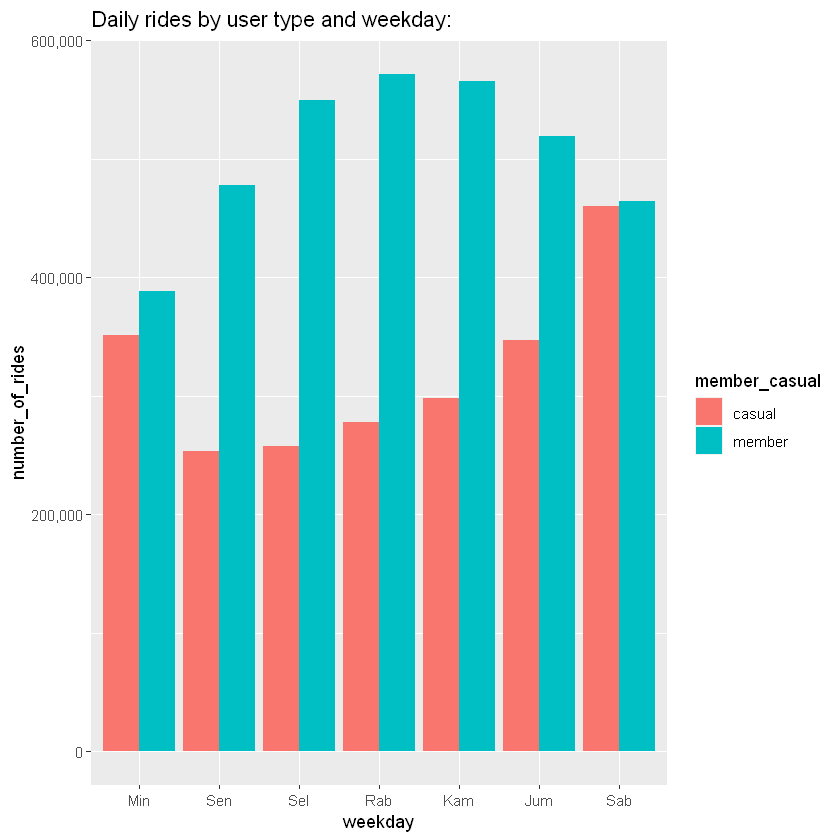

In [26]:
all_rides_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides=n(), average_duration = mean(ride_length)) %>% 
  arrange(member_casual,weekday) %>% 
  ggplot(aes(x=weekday,y=number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge")+
  scale_y_continuous(labels = comma)+
  ggtitle("Daily rides by user type and weekday:")

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


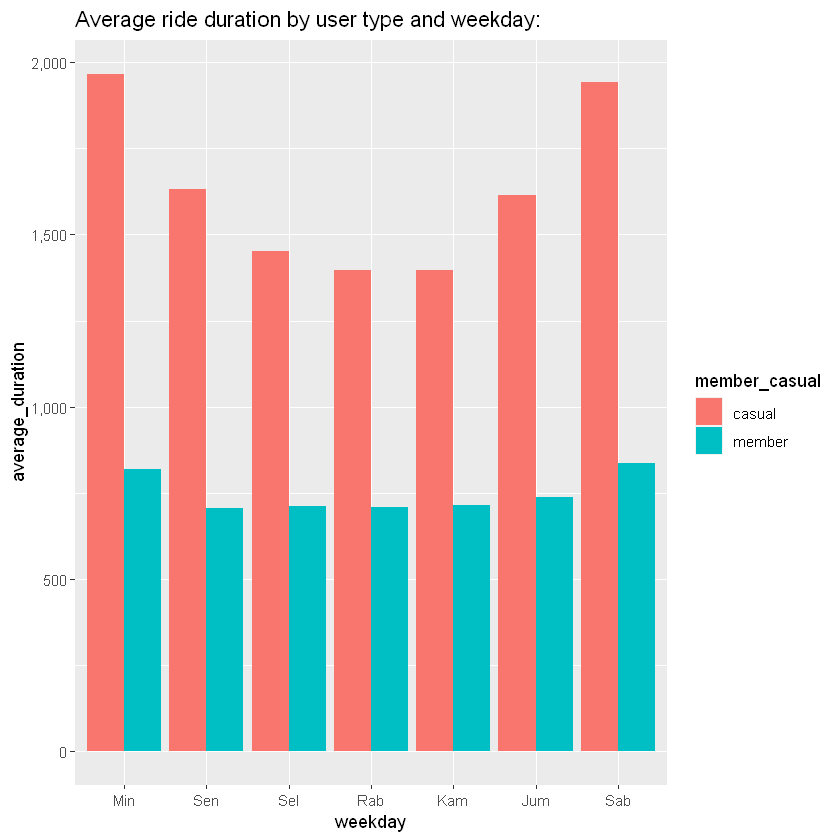

In [27]:
all_rides_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides=n(), average_duration = mean(ride_length)) %>% 
  arrange(member_casual,weekday) %>% 
  ggplot(aes(x=weekday,y=average_duration, fill = member_casual)) +
  geom_col(position = "dodge")+
  scale_y_continuous(labels = comma)+
  ggtitle("Average ride duration by user type and weekday:")

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


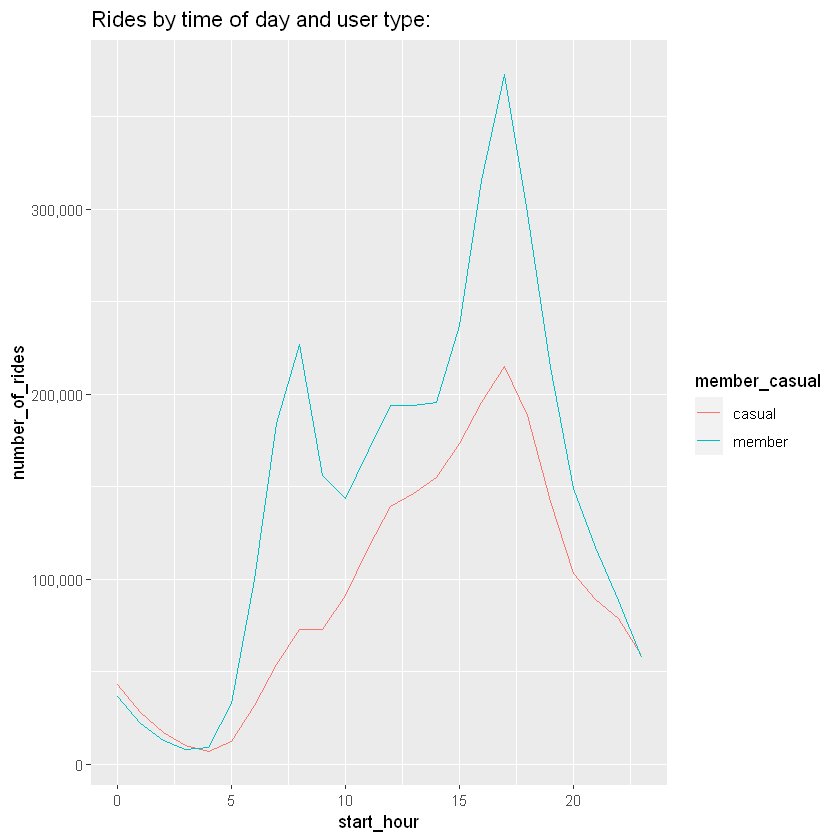

In [28]:
all_rides_v2 %>% 
  group_by(member_casual, start_hour) %>% 
  summarise(number_of_rides=n()) %>% 
  ggplot(aes(x=start_hour,y=number_of_rides, color = member_casual)) +
  geom_line()+
  scale_y_continuous(labels = comma)+
  ggtitle("Rides by time of day and user type:")

Further analysis on ‘rideable_type’ by user, weekday, time of day…

We first obtain the total amount of rides divided by annual member and casual rider, further subdivided by bicycle type (classic, electric and docked).

In [29]:
classic_member <- sum(all_rides_v2$member_casual == 'member' & all_rides_v2$rideable_type == 'classic_bike')
electric_member <- sum(all_rides_v2$member_casual == 'member' & all_rides_v2$rideable_type == 'electric_bike')
docked_member <- sum(all_rides_v2$member_casual == 'member' & all_rides_v2$rideable_type == 'docked_bike')

classic_casual <- sum(all_rides_v2$member_casual == 'casual' & all_rides_v2$rideable_type == 'classic_bike')
electric_casual <- sum(all_rides_v2$member_casual == 'casual' & all_rides_v2$rideable_type == 'electric_bike')
docked_casual <- sum(all_rides_v2$member_casual == 'casual' & all_rides_v2$rideable_type == 'docked_bike')

We search for correlations in our data

For example: does the bicycle type usage change over the week?

`summarise()` has grouped output by 'rideable_type'. You can override using the
`.groups` argument.


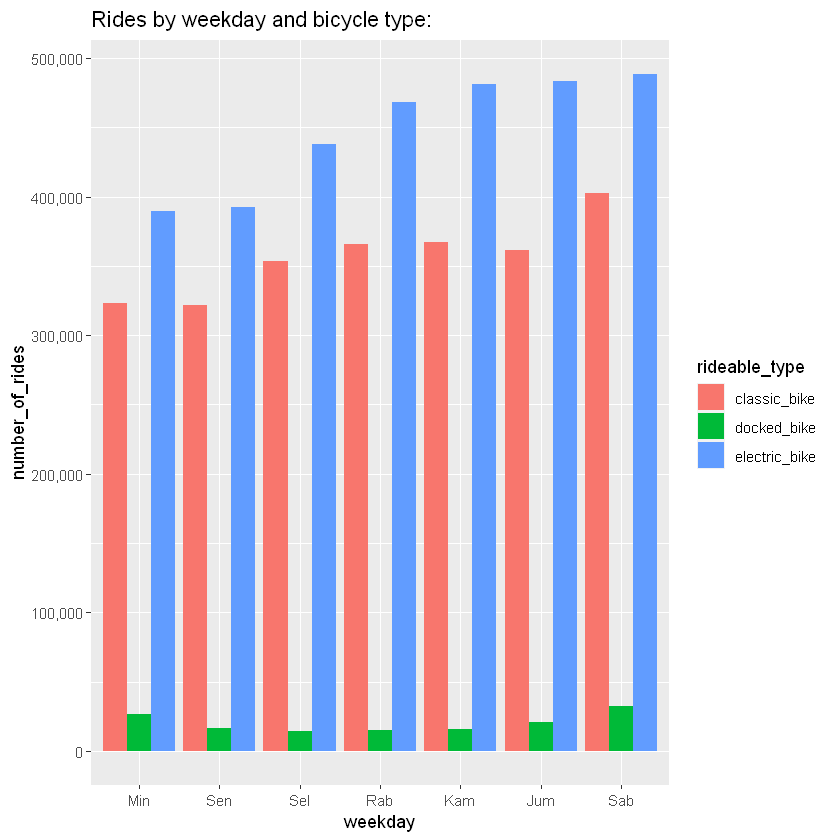

In [30]:
all_rides_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>%
  group_by(rideable_type, weekday) %>% 
  summarise(number_of_rides=n()) %>% 
  ggplot(aes(x=weekday,y=number_of_rides, fill=rideable_type)) +
  geom_col(position = "dodge")+
  scale_y_continuous(labels = comma)+
  ggtitle("Rides by weekday and bicycle type:")

Then we analyze for differences between annual members and casual riders with the types of bicycles they use:

`summarise()` has grouped output by 'rideable_type', 'member_casual'. You can
override using the `.groups` argument.
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


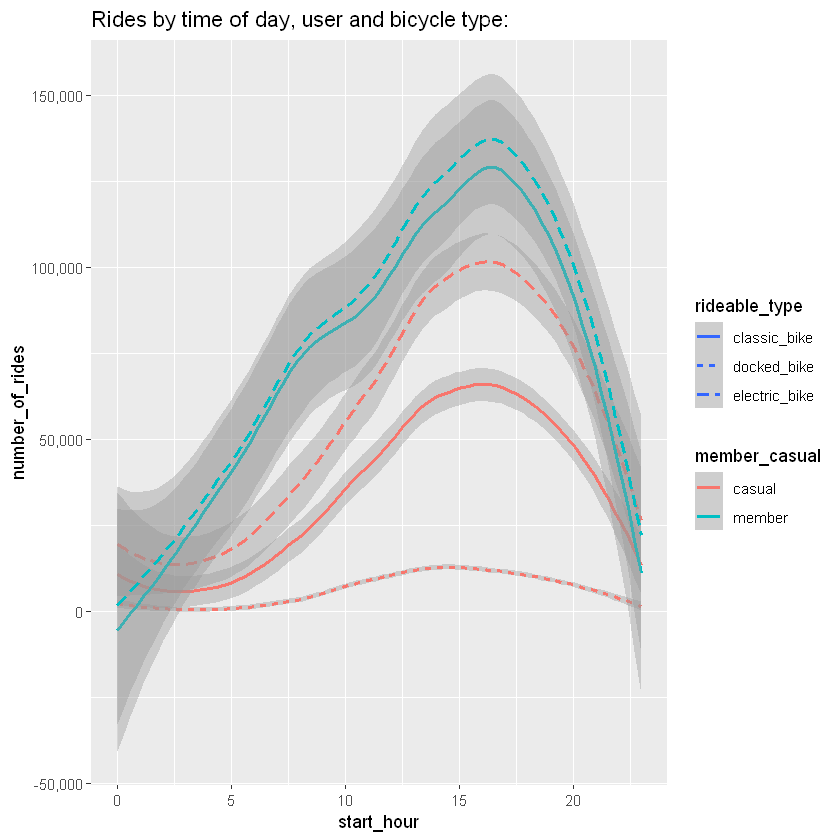

In [31]:
all_rides_v2 %>% 
  group_by(rideable_type, member_casual, start_hour) %>% 
  summarise(number_of_rides=n()) %>% 
  ggplot(aes(x=start_hour,y=number_of_rides, color=member_casual, linetype=rideable_type)) +
  geom_smooth()+
  scale_y_continuous(labels = comma)+
  ggtitle("Rides by time of day, user and bicycle type:")

Data Analysis Results:

Based on the data analysis, we found that casual riders have a longer average ride length of 1663 seconds compared to annual members, who have an average ride length of 742 seconds. However, annual members take nearly double the number of daily rides compared to casual riders.

Usage Patterns:

Casual riders typically start riding around 5 am, and their usage increases almost linearly until 4 pm, after which it gradually decreases. In contrast, annual members show usage spikes at 8 am and 4 pm. This suggests a strong relationship between annual members using Cyclistic as a means of commuting to work and back home.

Conclusion:

The analysis indicates that casual riders primarily use Cyclistic for leisure purposes, while annual members predominantly use it for their daily commute to work.

Next Steps:

To gain further insights, we recommend surveying our annual members directly, using a "yes or no" question, to inquire if they use Cyclistic bikes for commuting to work. Alternatively, the marketing campaign could focus on inspiring casual riders to become annual members, highlighting the benefits of using Cyclistic for their daily work commute. To reassure their intent, offering a free trial, money-back guarantee, or other attractive tactics could be considered.